In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, roc_curve)

In [49]:
df = pd.read_csv('S05-hw-dataset.csv')
df.columns = df.columns.str.strip()
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [51]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [52]:
target_dist = df['default'].value_counts(normalize=True) * 100
target_dist

default
0    58.966667
1    41.033333
Name: proportion, dtype: float64

Датасет содержит 3000 клиентов с 17 признаками (16 характеристик + целевая переменная). Все данные числовые, пропусков нет. Диапазоны значений реалистичны (возраст 21-69 лет, доход 15-156 тыс., кредитный рейтинг 402-850). Целевая переменная умеренно несбалансирована: 59% клиентов без дефолта, 41% с дефолтом. Отрицательные значения checking_balance (-3000) допустимы и означают долг на счете. Явных аномалий не обнаружено.

In [53]:
X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y, shuffle=True)

In [55]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_model.fit(X_train, y_train)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


In [56]:
y_pred_dummy = dummy_model.predict(X_test)
y_pred_proba_dummy = dummy_model.predict_proba(X_test)[:, 1]

In [57]:
print(classification_report(y_test, y_pred_dummy))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dummy))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       442
           1       0.00      0.00      0.00       308

    accuracy                           0.59       750
   macro avg       0.29      0.50      0.37       750
weighted avg       0.35      0.59      0.44       750

ROC-AUC: 0.5


Бейзлайн-модель (DummyClassifier) всегда предсказывает самый частый класс (0 - "нет дефолта"), что объясняет accuracy 59% - ровно такую же долю, как и процент клиентов без дефолта в данных. Это создает "точку отсчёта": любая полезная модель должна превосходить это наивное предсказание. ROC-AUC = 0.5 подтверждает, что модель не обладает дискриминационной способностью - её предсказания не лучше случайного угадывания.

In [58]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

In [59]:
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [60]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'logreg__C': [0.001, 0.01, ...], 'logreg__solver': ['liblinear', 'lbfgs']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [61]:
best_model = grid_search.best_estimator_

y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

In [62]:
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_logreg))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       442
           1       0.73      0.75      0.74       308

    accuracy                           0.78       750
   macro avg       0.78      0.78      0.78       750
weighted avg       0.79      0.78      0.78       750

ROC-AUC: 0.8640624081800552


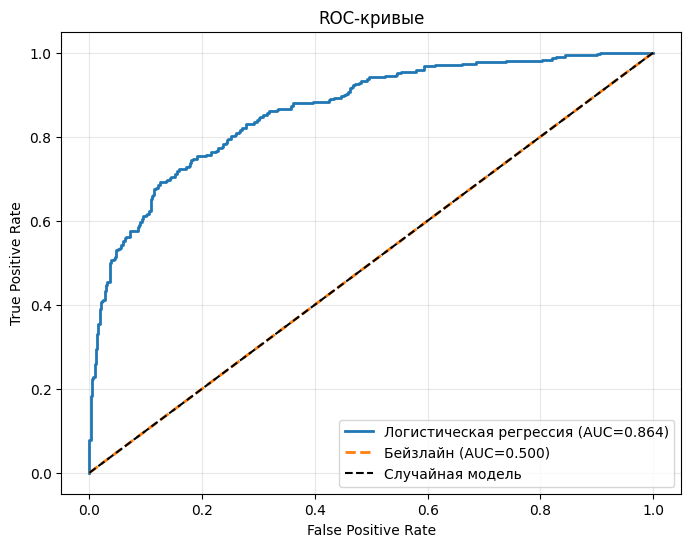

In [63]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Логистическая регрессия (AUC={roc_auc_logreg:.3f})', lw=2)
plt.plot(fpr_dummy, tpr_dummy, label=f'Бейзлайн (AUC={roc_auc_dummy:.3f})', lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.savefig('figures/roc_curves.png', dpi=100, bbox_inches='tight')
plt.show()

In [64]:
comparison_df = pd.DataFrame({
    'Модель': ['DummyClassifier', 'LogisticRegression'],
    'Accuracy': [accuracy_score(y_test, y_pred_dummy), accuracy_score(y_test, y_pred_logreg)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_dummy), roc_auc_score(y_test, y_pred_proba_logreg)]
})

print(comparison_df.round(3))

               Модель  Accuracy  ROC-AUC
0     DummyClassifier     0.589    0.500
1  LogisticRegression     0.784    0.864


Бейзлайн-модель (DummyClassifier) показала accuracy 59%, что соответствует доле отрицательного класса в данных, но не обладает предсказательной силой (ROC-AUC=0.5). Логистическая регрессия с подобранными гиперпараметрами значительно превзошла бейзлайн: accuracy выросла на 19 пунктов до 78%, а ROC-AUC достиг 0.864, что указывает на хорошую разделяющую способность.

GridSearchCV выбрал параметр C=0.01 при solver='lbfgs', что означает умеренно сильную регуляризацию - это помогло избежать переобучения. Модель корректно предсказывает оба класса (precision=0.73, recall=0.75 для дефолта), что важно для минимизации кредитных рисков.

Для практического применения в банковской среде логистическая регрессия подходит лучше, поскольку она не только дает качественные предсказания, но и остается интерпретируемой. Можно понять, какие факторы больше всего влияют на вероятность дефолта, что важно для принятия обоснованных решений при одобрении кредитов.